**Name:** Bala Guga Gopal S

**Script Name:** Final Review: Mini Project Final Review

**Script Description:** Indian Vehicle classification using CNN

# Indian Vehicle classification using CNN 
In intelligent traffic management and transportation, vehicle classifiers play a significant role. It's tough to tell one vehicle type from another. The vehicle classification problem is fundamentally an image classification problem, and Convolutional Neural Networks are the ideal tool for the job because they require less image preprocessing than other approaches. Unlike classic machine learning algorithms, convolutional neural networks do not require handcrafted features for classification.

In This script two approach have used to solve the classification problem 
1. By creating a model
2. By Using Transfer Learning

This script follows a basic machine learning workflow:

    * Examine and understand data
    * Build an input pipeline
    * Build the model
    * Train the model
    * Test the model

The workspace for the script have been created using the google drive only for storing and saving the data and model.

### Workspace creation

In [ ]:
# importing google drive to create the work space
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# creating a working directory to load the dataset.
%cd '/content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset'

/content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset


### Dataset Loading

The dataset consists of Indian vehicle images for classification and object detection. It is observed that there is very little or no dataset available on these vehicles like autorickshaw, tempo, trucks, etc. The images have been taken in varied weather conditions in daylight, evening, and night. The dataset has a wide variety of variations of illumination, distances, viewpoints, etc. This dataset represents a very challenging set of images of vehicles of niche classes. This dataset can be used for imge recognition and object detection for driver assistance systems, autonomous driving, etc.

Vehicle Classes 

    Indian Auto
    Indian Truck
    Bus
    Truck
    Tempo Traveller
    Tractor
    Car
    Two Wheelers.. (etc)

Dataset - [link](https://www.kaggle.com/dataclusterlabs/indian-vehicle-dataset)

![image.png]()

In [ ]:
# Configure Working directory to for Kaggle Json image (important to download the dataset from Kaggle to google drive via colab)
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset/kaggle"

In [ ]:
# Dataset API from Kaggle
!kaggle datasets download -d dataclusterlabs/indian-vehicle-dataset

In [ ]:
# Unzip the folders and to delete the .zip file.
!unzip \*.zip  && rm *.zip

Archive:  indian-vehicle-dataset.zip
  inflating: Auto/Datacluster Auto (1).jpg  
  inflating: Auto/Datacluster Auto (10).jpg  
  inflating: Auto/Datacluster Auto (100).jpg  
  inflating: Auto/Datacluster Auto (101).jpg  
  inflating: Auto/Datacluster Auto (102).jpg  
  inflating: Auto/Datacluster Auto (103).jpg  
  inflating: Auto/Datacluster Auto (104).jpg  
  inflating: Auto/Datacluster Auto (105).jpg  
  inflating: Auto/Datacluster Auto (106).jpg  
  inflating: Auto/Datacluster Auto (107).jpg  
  inflating: Auto/Datacluster Auto (108).jpg  
  inflating: Auto/Datacluster Auto (109).jpg  
  inflating: Auto/Datacluster Auto (11).jpg  
  inflating: Auto/Datacluster Auto (110).jpg  
  inflating: Auto/Datacluster Auto (111).jpg  
  inflating: Auto/Datacluster Auto (112).jpg  
  inflating: Auto/Datacluster Auto (113).jpg  
  inflating: Auto/Datacluster Auto (114).jpg  
  inflating: Auto/Datacluster Auto (115).jpg  
  inflating: Auto/Datacluster Auto (116).jpg  
  inflating: Auto/Dataclust

### Import TensorFlow libraries and other Dependencies 

ImageDataGenerator from keras is used to Load the data from the directory. Very useful in doing Image preprocessing. 
To load the images, Generate batches of tensor image data with real-time data augmentation. ImageDataGenerator can be used.

[ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)  - library link


In [ ]:
# Import tensorflow library and other dependencies
# Checking for GPU availability

import tensorflow as tf
import os
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.7.0
Is using GPU? False


### Dataset preprocessing

In [ ]:
data_root = ("/content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset")

In [ ]:
IMAGE_SHAPE = (224, 224) # (height, width) in no. of pixels

In [ ]:
TRAINING_DATA_DIR = str(data_root)

In [ ]:
datagen_kwargs = dict(rescale=1./255, validation_split=.20) #Spliting of Data

In [ ]:
# loading the dataset images form the directory and splitting between , training and Validations
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

valid_generator = valid_datagen.flow_from_directory(
                  TRAINING_DATA_DIR,
                  subset="validation",
                  shuffle=True,
                  target_size=IMAGE_SHAPE
                  )

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

train_generator = train_datagen.flow_from_directory(
                  TRAINING_DATA_DIR,
                  subset="training",
                  shuffle=True,
                  target_size=IMAGE_SHAPE)

Found 146 images belonging to 6 classes.
Found 598 images belonging to 6 classes.


### Visualizing the data

(32, 244, 244, 3) means in one batch of images consist of 32 images and 244, 244 is height and width of images and 3 is RGB three colour channels.

label_batch shape is (32, 6) means there are 32 labels and 6 because the labels are in one hot encoded format.

In [ ]:
# Iterating through the images and labels in train_generator

for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 6))

In [ ]:
class_name = train_generator.class_indices
class_names = train_generator.classes
print(class_names)
print(class_name)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [ ]:
# dataset labels and Number of classes
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Auto' 'Bus' 'Tempo Traveller' 'Tractor' 'Truck' 'Models']


In [ ]:
# write the Images to a text file
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
 f.write(labels)
!cat labels.txt

Auto
Bus
Tempo Traveller
Tractor
Truck
models

### Model creation

 It creates an image classifier using a tf.keras.Sequential model. The Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu').

In [ ]:
# model creation
def create_model(num_classes):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', 
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model
model = create_model(num_classes=6)

For optimizer and Loss function, the tf.keras.optimizers.Adam optimizer and tf.keras.losses.SparseCategoricalCrossentropy loss function have been taken. To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.summary() #Model summary ( all the layers of the network)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 32)      

In [ ]:
# Training the model with 30 epoch
EPOCHS = 30
#BATCH_SIZE = 32
BATCH_SIZE = valid_generator.batch_size
print("BATCH_SIZE :", BATCH_SIZE)
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

history = model.fit(train_generator,
                    epochs=EPOCHS,
                    verbose=1,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = valid_generator,
                    validation_steps= val_steps_per_epoch,
                    )

BATCH_SIZE : 32
Epoch 1/30
19/19 [==============================] - ETA: 0s - loss: 1.6342 - accuracy: 0.2458

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 161s 9s/step - loss: 1.6342 - accuracy: 0.2458 - val_loss: 1.6260 - val_accuracy: 0.2123
Epoch 2/30
19/19 [==============================] - 153s 8s/step - loss: 1.6034 - accuracy: 0.2358 - val_loss: 1.5863 - val_accuracy: 0.2740
Epoch 3/30
19/19 [==============================] - 154s 8s/step - loss: 1.5557 - accuracy: 0.2960 - val_loss: 1.5816 - val_accuracy: 0.2740
Epoch 4/30
19/19 [==============================] - 153s 8s/step - loss: 1.5192 - accuracy: 0.3344 - val_loss: 1.5744 - val_accuracy: 0.2808
Epoch 5/30
19/19 [==============================] - 148s 8s/step - loss: 1.4826 - accuracy: 0.3779 - val_loss: 1.5578 - val_accuracy: 0.3288
Epoch 6/30
19/19 [==============================] - 149s 8s/step - loss: 1.4349 - accuracy: 0.4348 - val_loss: 1.5575 - val_accuracy: 0.2808
Epoch 7/30
19/19 [==============================] - 151s 8s/step - loss: 1.3953 - accuracy: 0.4415 - val_loss: 1.5542 - val_accuracy: 0.3288
Epoch 8/30
19/19 [======

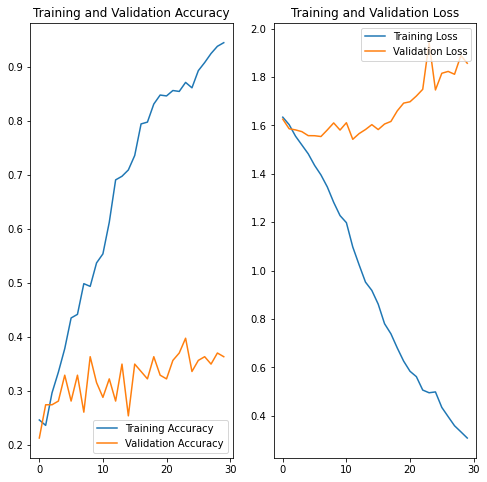

In [ ]:
# plotting accuracy (for validation and training), loss (for validation and training)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

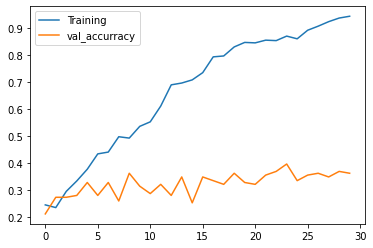

In [ ]:
accuracy = history.history['accuracy']
val_accurracy = history.history['val_accuracy']

plt.plot(range(len(accuracy)), accuracy, label='Training')
plt.plot(range(len(accuracy)), val_accurracy, label='val_accurracy')
plt.legend()
plt.show()

In [ ]:
# Model evaluation and Final accuracy of the model from validation dataset.

val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

5/5 [==============================] - 32s 6s/step - loss: 1.8572 - accuracy: 0.3630
Final loss: 1.86
Final accuracy: 36.30%


In [ ]:
#Model Predection from Val_batch

val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
tf_model_predictions = model.predict(val_image_batch)
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]

Prediction results shape: (32, 6)


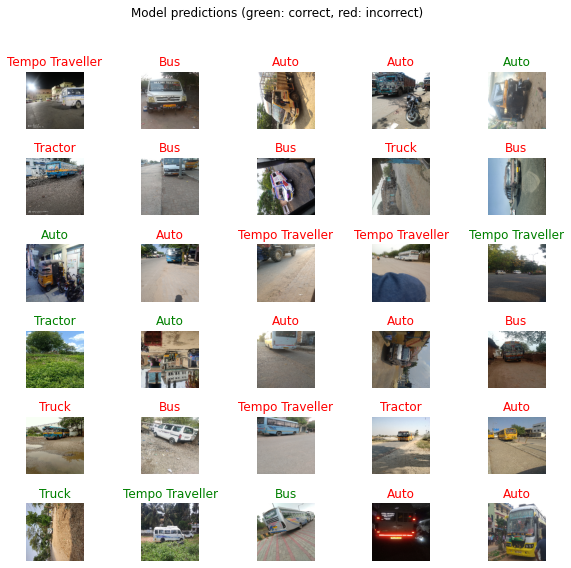

In [ ]:

print("Prediction results shape:", tf_model_predictions.shape)
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
 plt.subplot(6,5,n+1)
 plt.imshow(val_image_batch[n])
 color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
 plt.title(predicted_labels[n].title(), color=color)
 plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

#Green colour shows correctly predicted images and the red colour shows mismatch from the dataset class directory. 

In [ ]:
auto_url = "https://static3.bigstockphoto.com/5/4/9/large2/94577318.jpg"
auto_path = tf.keras.utils.get_file('Auto', origin=auto_url)

img = tf.keras.utils.load_img(
    auto_path, target_size=(224, 224)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 0 with a 100.00 percent confidence.


# USING THE TRANSFERLEARNING

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pretrained model as is or use transfer learning to customize this model to a given task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world.

TensorFlow hub to Load a pre-trained model

In [ ]:
!pip install tensorflow_hub

In [ ]:
import tensorflow_hub as hub

The base model is from the MobileNet V2 model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like jackfruit and syringe. This base of knowledge will help to classify different Vehicles. 

In [ ]:
model = tf.keras.Sequential([
 hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
 output_shape=[1280],
 trainable=False),
 tf.keras.layers.Dropout(0.4),
 tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

In [ ]:
model.summary() #Model summary ( all the layers of the network)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#Model compiling

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
 optimizer=optimizer,
 loss='categorical_crossentropy',
 metrics=['acc'])

In [ ]:
# Training the model with 20 epoch

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
 train_generator, 
 epochs=20,
 verbose=1,
 steps_per_epoch=steps_per_epoch,
 validation_data=valid_generator,
 validation_steps=val_steps_per_epoch).history

Epoch 1/20
19/19 [==============================] - 356s 18s/step - loss: 1.9182 - acc: 0.2542 - val_loss: 1.3682 - val_acc: 0.3973
Epoch 2/20
19/19 [==============================] - 121s 6s/step - loss: 1.5326 - acc: 0.3779 - val_loss: 1.2050 - val_acc: 0.5479
Epoch 3/20
19/19 [==============================] - 117s 6s/step - loss: 1.3213 - acc: 0.4766 - val_loss: 1.1059 - val_acc: 0.5959
Epoch 4/20
19/19 [==============================] - 117s 6s/step - loss: 1.2081 - acc: 0.5485 - val_loss: 1.0351 - val_acc: 0.6027
Epoch 5/20
19/19 [==============================] - 117s 6s/step - loss: 1.0588 - acc: 0.5853 - val_loss: 0.9876 - val_acc: 0.6370
Epoch 6/20
19/19 [==============================] - 117s 6s/step - loss: 0.9418 - acc: 0.6455 - val_loss: 0.9654 - val_acc: 0.6233
Epoch 7/20
19/19 [==============================] - 119s 6s/step - loss: 0.9369 - acc: 0.6488 - val_loss: 0.9421 - val_acc: 0.6438
Epoch 8/20
19/19 [==============================] - 118s 6s/step - loss: 0.8712 - 

In [ ]:
# Model evaluation and Final accuracy of the model from validation dataset.

final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

5/5 [==============================] - 25s 5s/step - loss: 0.8965 - acc: 0.6644
Final loss: 0.90
Final accuracy: 66.44%


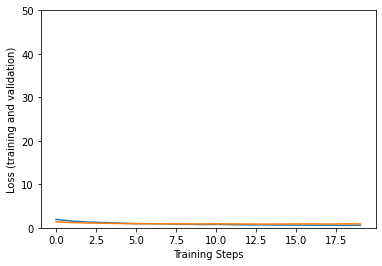

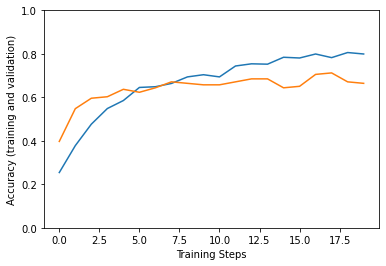

In [ ]:
# plotting accuracy (for validation and training), loss (for validation and training)

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,50])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

In [ ]:
# Save the model in the drive

VEHICLE_SAVED_MODEL = "/content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset/models/saved_model"
model.save(VEHICLE_SAVED_MODEL)

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset/models/saved_model/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset/models/saved_model/assets


In [ ]:
#Model Predection from Val_batch

val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]

Prediction results shape: (32, 6)


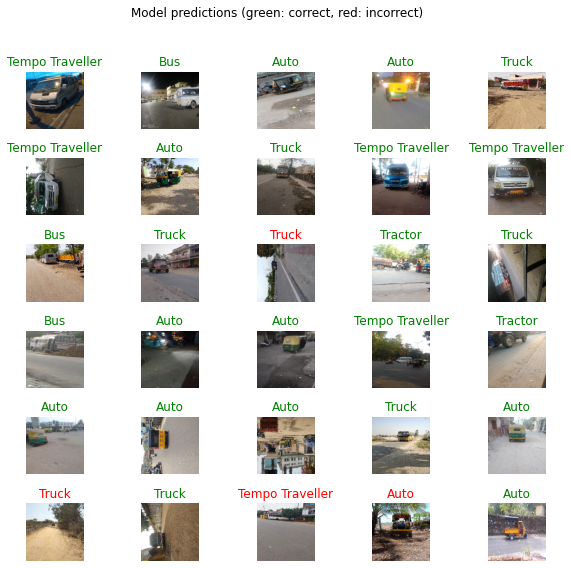

In [ ]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
 plt.subplot(6,5,n+1)
 plt.imshow(val_image_batch[n])
 color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
 plt.title(predicted_labels[n].title(), color=color)
 plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

#Green colour shows correctly predicted images and the red colour shows mismatch from the dataset class directory. 

### Reload and test the model

In [ ]:
# Load the saved model and test it with unseen data 
load_save_model = tf.keras.models.load_model(VEHICLE_SAVED_MODEL)
load_save_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Accuracy on saved model

final_loss, final_accuracy = load_save_model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

5/5 [==============================] - 25s 5s/step - loss: 0.8965 - acc: 0.6644
Final loss: 0.90
Final accuracy: 66.44%


In [ ]:
# Loading Image from the url

auto_url = "https://bizimages.withfloats.com/tile/5b61526a46c7460503709287.jpg"
auto_path = tf.keras.utils.get_file('Auto', origin=auto_url)

img = tf.keras.utils.load_img(
    auto_path, target_size=(224, 224)
)

img.show()

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [ ]:
# making predictions

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(dataset_labels[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Truck with a 24.07 percent confidence.


In [ ]:
# Loading Image from the url

auto_url = "https://i.pinimg.com/564x/68/80/df/6880df8fae92d44bdf849b5eae41831e--modern-india-hold-on.jpg"
auto_path = tf.keras.utils.get_file('Auto', origin=auto_url)

img = tf.keras.utils.load_img(
    auto_path, target_size=(224, 224)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [ ]:
# making predictions

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(dataset_labels[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Truck with a 24.07 percent confidence.
